In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
import numpy as np
%matplotlib inline
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)

(400, 4096)


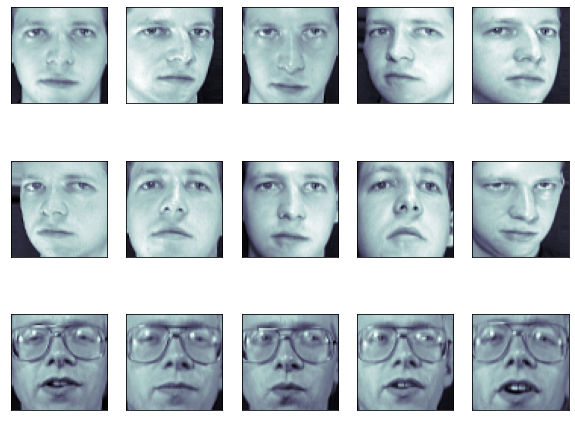

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10, 8))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,faces.target,test_size=0.2 ,random_state=0)
print(X_train.shape, X_test.shape)

(320, 4096) (80, 4096)


In [4]:
## using navie bias

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

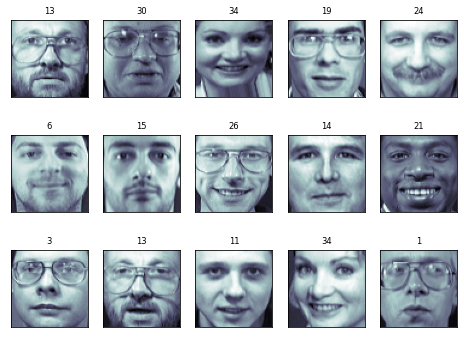

In [6]:
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [7]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       0.25      1.00      0.40         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           9       0.25      1.00      0.40         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

## Observation 1
Accuracy without PCA comes out to be 78. While when we used PCA + NavieBias we got accuracy 82. So we can say that PCA helps imporve accuracy.

In [8]:
print(metrics.confusion_matrix(y_test, y_pred))

[[5 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision.mean()))
print('recall: {}'.format(recall.mean()))

precision: 0.7635135135135135
recall: 0.8243243243243243


## Obersvation 2
Mean of precision was 0.86 with PCA and 0.79 without PCA. So we can say that PCA also helps to increase total numbers of true posotive values
## Oversvation 3
Mean of recall was 0.85 with PCA and 0.81 without PCA. This means that correct output is generated more when we use PCA

So we can conculde that it is better to use PCA + NavieBias then use only NavieBias

## IRIS dataset

In [10]:
from sklearn import datasets
iris = datasets.load_iris()
# iris
print("Features: ", iris.feature_names)
print("Labels: ", iris.target_names) #n 4

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_new = pca.fit_transform(iris.data)
print(X_new.shape)

(150, 4)


In [25]:
print('Eigenvectors or principal component')
print(pca.components_)
print()
print('Eigenvalues or explained variance')
print(pca.explained_variance_)

Eigenvectors or principal component
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]

Eigenvalues or explained variance
[4.22824171 0.24267075 0.0782095  0.02383509]


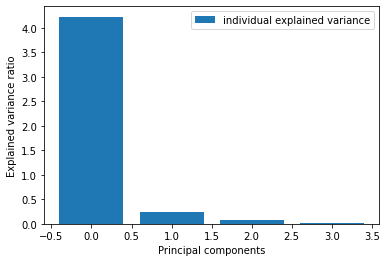

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

plt.bar(range(4),pca.explained_variance_, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()

## PCA + NaiveBias

In [34]:
#
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [38]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(112, 3)
(38, 3)


In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
y_pred = gnb.predict(X_test_pca)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [40]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]


In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision.mean()))
print('recall: {}'.format(recall.mean()))

Accuracy: 0.9210526315789473
precision: 0.9111111111111111
recall: 0.9212962962962963
